In [314]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [315]:
#Load the data
LVMH_data = pd.read_csv("MC.PA.csv")
Peugeot_data = pd.read_csv("UG.PA.csv")
Mercialys_data = pd.read_csv("MERY.PA.csv")

In [316]:
LVMH_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-18,373.899994,377.899994,373.049988,375.049988,365.838013,515274.0
1,2019-10-21,375.649994,376.649994,372.799988,374.600006,365.399078,337676.0
2,2019-10-22,374.350006,376.649994,370.149994,376.649994,367.398712,305573.0
3,2019-10-23,374.399994,375.950012,370.299988,375.000000,365.789276,415169.0
4,2019-10-24,377.600006,379.350006,373.850006,377.049988,367.788910,351479.0


In [317]:
#Get the number of trading days
print(LVMH_data.shape)
print(Peugeot_data.shape)
print(Mercialys_data.shape)

(256, 7)
(256, 7)
(256, 7)


We have 256 days in a year.

In [318]:
#Merging the three datasets
merged_data = LVMH_data.merge(Peugeot_data, on = "Date",suffixes = ["_LVMH","_Peugeot"]).merge(Mercialys_data, on = "Date")

In [319]:
merged_data = merged_data.rename(columns = {"Open": "Open_Mercialys", 
                                  "High":"High_Mercialys", 
                                  "Low": "Low_Mercialys",
                                 "Close":"Close_Mercialys",
                                 "Adj Close": "Adj Close_Mercialys",
                                 "Volume" : "Volume_Mercialys"}) 

In [320]:
#Visualizing the data
merged_data = merged_data.set_index('Date')
merged_data

,Open_LVMH,High_LVMH,Low_LVMH,Close_LVMH,Adj Close_LVMH,Volume_LVMH,Open_Peugeot,High_Peugeot,Low_Peugeot,Close_Peugeot,Adj Close_Peugeot,Volume_Peugeot,Open_Mercialys,High_Mercialys,Low_Mercialys,Close_Mercialys,Adj Close_Mercialys,Volume_Mercialys
Date,,,,,,,,,,,,,,,,,,
2019-10-18,373.899994,377.899994,373.049988,375.049988,365.838013,515274.0,23.360001,23.940001,22.940001,23.660000,21.154465,3045615.0,12.800,12.880,12.620,12.680,11.449845,242549.0
2019-10-21,375.649994,376.649994,372.799988,374.600006,365.399078,337676.0,23.750000,24.010000,23.660000,23.740000,21.225992,1926017.0,12.310,12.430,12.230,12.370,11.599883,211568.0
2019-10-22,374.350006,376.649994,370.149994,376.649994,367.398712,305573.0,23.770000,24.040001,23.549999,24.040001,21.494225,2078279.0,12.400,12.500,12.240,12.300,11.534242,241273.0
2019-10-23,374.399994,375.950012,370.299988,375.000000,365.789276,415169.0,23.559999,24.860001,23.549999,24.820000,22.191622,4625883.0,12.270,12.440,12.220,12.400,11.628016,213607.0
2019-10-24,377.600006,379.350006,373.850006,377.049988,367.788910,351479.0,24.900000,25.340000,24.760000,25.040001,22.388327,3882535.0,12.420,12.490,12.190,12.200,11.440467,172822.0
2019-10-25,376.149994,383.950012,376.000000,383.950012,374.519440,411884.0,24.840000,25.120001,24.559999,24.840000,22.209505,2389222.0,12.170,12.310,12.170,12.300,11.534242,72359.0
2019-10-28,385.000000,389.600006,382.100006,382.100006,372.714874,537028.0,24.900000,25.180000,24.799999,24.860001,22.227388,2496725.0,12.310,12.450,12.310,12.400,11.628016,89528.0
2019-10-29,382.600006,383.899994,379.700012,380.250000,370.910309,433890.0,24.799999,25.020000,24.660000,24.920000,22.281033,2028824.0,12.390,12.390,12.240,12.290,11.524864,102774.0
2019-10-30,379.549988,385.500000,376.750000,384.450012,375.007141,408123.0,26.110001,27.059999,25.450001,26.049999,23.291368,10509826.0,12.300,12.440,12.230,12.440,11.665524,96792.0


In [321]:
stocks = merged_data[['Close_LVMH','Close_Peugeot','Close_Mercialys']]
stocks

,Close_LVMH,Close_Peugeot,Close_Mercialys
Date,,,
2019-10-18,375.049988,23.660000,12.680
2019-10-21,374.600006,23.740000,12.370
2019-10-22,376.649994,24.040001,12.300
2019-10-23,375.000000,24.820000,12.400
2019-10-24,377.049988,25.040001,12.200
2019-10-25,383.950012,24.840000,12.300
2019-10-28,382.100006,24.860001,12.400
2019-10-29,380.250000,24.920000,12.290
2019-10-30,384.450012,26.049999,12.440


In [322]:
#missing values
stocks.isnull().sum()

Close_LVMH         2
Close_Peugeot      2
Close_Mercialys    2
dtype: int64

In [323]:
# Drop missing values as they are only 2
stocks = stocks.dropna()

In [324]:
stocks.shape

(254, 3)

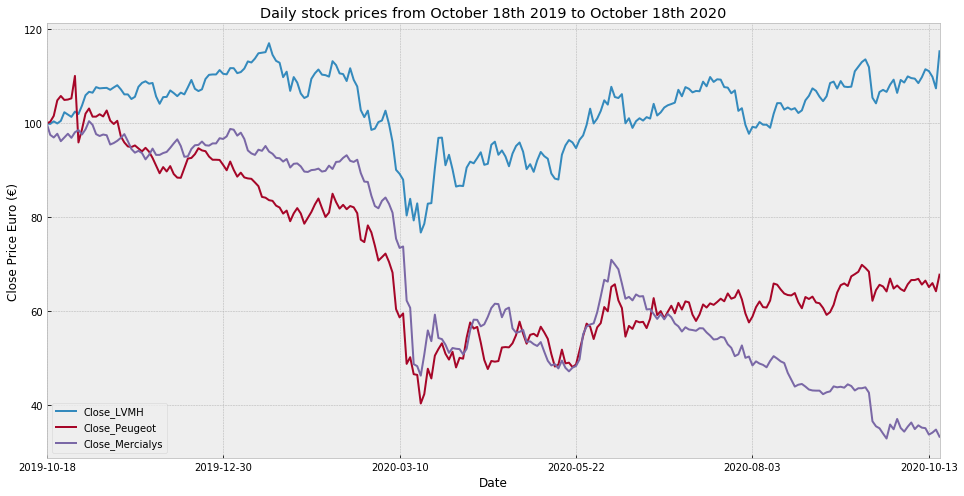

In [325]:
(stocks/stocks.iloc[0]*100).plot(figsize=(16,8))
plt.title('Daily stock prices from October 18th 2019 to October 18th 2020')
plt.xlabel('Date')
plt.ylabel('Close Price Euro (€)')
plt.legend()
plt.show()

In [326]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
stocks[['Prediction_LVMH','Prediction_Peugeot','Prediction_Mercialys']]= stocks[['Close_LVMH','Close_Peugeot','Close_Mercialys']].shift(-future_days)
stocks

C:\Users\ossed\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Close_LVMH,Close_Peugeot,Close_Mercialys,Prediction_LVMH,Prediction_Peugeot,Prediction_Mercialys
Date,,,,,,
2019-10-18,375.049988,23.660000,12.680,396.250000,22.549999,11.890
2019-10-21,374.600006,23.740000,12.370,404.250000,22.400000,11.940
2019-10-22,376.649994,24.040001,12.300,407.350006,22.250000,11.880
2019-10-23,375.000000,24.820000,12.400,408.649994,22.430000,11.710
2019-10-24,377.049988,25.040001,12.200,406.750000,22.240000,11.830
2019-10-25,383.950012,24.840000,12.300,407.299988,21.920000,12.000
2019-10-28,382.100006,24.860001,12.400,396.549988,21.530001,11.830
2019-10-29,380.250000,24.920000,12.290,390.700012,21.150000,11.830
2019-10-30,384.450012,26.049999,12.440,396.000000,21.459999,11.880


In [327]:
#Create the feature dataset (X) and convert it to a numpy array and remoe the last 'x' rows/days
X = np.array(stocks.drop(['Prediction_LVMH','Prediction_Peugeot','Prediction_Mercialys'],1))[:-future_days]
X

array([[375.049988,  23.66    ,  12.68    ],
       [374.600006,  23.74    ,  12.37    ],
       [376.649994,  24.040001,  12.3     ],
       [375.      ,  24.82    ,  12.4     ],
       [377.049988,  25.040001,  12.2     ],
       [383.950012,  24.84    ,  12.3     ],
       [382.100006,  24.860001,  12.4     ],
       [380.25    ,  24.92    ,  12.29    ],
       [384.450012,  26.049999,  12.44    ],
       [382.5     ,  22.700001,  12.5     ],
       [389.25    ,  23.360001,  12.38    ],
       [397.5     ,  24.15    ,  12.52    ],
       [400.25    ,  24.41    ,  12.74    ],
       [399.549988,  24.      ,  12.64    ],
       [404.      ,  24.      ,  12.39    ],
       [403.      ,  24.120001,  12.34    ],
       [403.25    ,  24.01    ,  12.38    ],
       [403.399994,  24.309999,  12.36    ],
       [401.850006,  23.799999,  12.11    ],
       [403.75    ,  23.629999,  12.15    ],
       [405.5     ,  23.790001,  12.21    ],
       [402.25    ,  23.01    ,  12.29    ],
       [39

In [328]:
#Create the target dataset (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/dates
y = np.array(stocks[['Prediction_LVMH','Prediction_Peugeot','Prediction_Mercialys']])[:-future_days]
y

array([[396.25    ,  22.549999,  11.89    ],
       [404.25    ,  22.4     ,  11.94    ],
       [407.350006,  22.25    ,  11.88    ],
       [408.649994,  22.43    ,  11.71    ],
       [406.75    ,  22.24    ,  11.83    ],
       [407.299988,  21.92    ,  12.      ],
       [396.549988,  21.530001,  11.83    ],
       [390.700012,  21.15    ,  11.83    ],
       [396.      ,  21.459999,  11.88    ],
       [396.200012,  21.24    ,  11.91    ],
       [401.350006,  21.51    ,  12.02    ],
       [399.25    ,  21.110001,  12.14    ],
       [396.799988,  20.93    ,  12.25    ],
       [399.600006,  20.92    ,  12.07    ],
       [398.200012,  21.41    ,  11.78    ],
       [403.799988,  21.889999,  11.79    ],
       [409.700012,  21.92    ,  11.99    ],
       [402.649994,  22.110001,  12.09    ],
       [400.850006,  22.41    ,  12.1     ],
       [402.25    ,  22.299999,  12.19    ],
       [410.5     ,  22.26    ,  12.09    ],
       [413.799988,  21.99    ,  12.08    ],
       [41

In [329]:
#Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [330]:
#Get the last 'x' rows of the feature dataset
x_future = stocks.drop(['Prediction_LVMH','Prediction_Peugeot','Prediction_Mercialys'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[374.      ,  14.39    ,   6.1     ],
       [371.549988,  14.74    ,   6.27    ],
       [382.700012,  15.6     ,   6.4     ],
       [391.200012,  15.54    ,   6.335   ],
       [391.200012,  15.3     ,   6.26    ],
       [386.049988,  15.095   ,   6.215   ],
       [387.75    ,  15.02    ,   5.95    ],
       [386.049988,  15.      ,   5.765   ],
       [387.200012,  15.12    ,   5.58    ],
       [383.350006,  14.655   ,   5.63    ],
       [385.450012,  14.355   ,   5.65    ],
       [393.450012,  14.92    ,   5.58    ],
       [397.049988,  14.82    ,   5.5     ],
       [403.      ,  14.94    ,   5.475   ],
       [401.      ,  14.645   ,   5.47    ],
       [396.350006,  14.605   ,   5.47    ],
       [392.799988,  14.37    ,   5.375   ],
       [396.700012,  14.02    ,   5.425   ],
       [407.25    ,  14.16    ,   5.45    ],
       [408.399994,  14.525   ,   5.585   ],
       [402.850006,  15.145   ,   5.56    ],
       [408.799988,  15.515   ,   5.575   ],
       [40

In [331]:
#Create the models, the fitting and the prediction
tree_prediction = pd.DataFrame()
lr_prediction = pd.DataFrame()
names = ['LMVH_pred','Peugeot_pred','Mercialys_Pred']

for i,j in zip(range(X_train.shape[1]),names):
    #Create the decision tree regression model
    tree = DecisionTreeRegressor()
    tree.fit(X_train[:,i].reshape(-1,1),y_train[:,i].reshape(-1,1))
    tree_prediction[f'{j}'] = tree.predict(x_future[:,i].reshape(-1,1))
    #Create the linear regression model
    lr = LinearRegression()
    lr.fit(X_train[:,i].reshape(-1,1),y_train[:,i].reshape(-1,1))
    lr_prediction[f'{j}'] = lr.predict(x_future[:,i].reshape(-1,1)).ravel()

In [332]:
#Display the Decision Tree prediction
tree_prediction

,LMVH_pred,Peugeot_pred,Mercialys_Pred
0,410.475006,15.595000,5.4750
1,420.250000,16.190001,5.5350
2,424.000000,16.540001,5.4550
3,423.074997,16.385000,5.5600
4,423.074997,16.195000,5.4825
5,400.100006,15.450000,5.4825
6,391.049988,15.265000,4.5080
7,400.100006,15.535000,4.4540
8,401.799988,15.450000,4.3120
9,400.200012,15.200000,4.1780


In [333]:
#Display the linear regression prediction
lr_prediction

,LMVH_pred,Peugeot_pred,Mercialys_Pred
0,383.370778,14.392008,5.612897
1,382.497866,14.620205,5.762935
2,386.470496,15.180918,5.877670
3,389.498952,15.141799,5.820302
4,389.498952,14.985321,5.754109
5,387.664055,14.851662,5.714393
6,388.269751,14.802763,5.480510
7,387.664055,14.789723,5.317233
8,388.073796,14.867962,5.153957
9,386.702081,14.564786,5.198086


In [334]:
stocks

,Close_LVMH,Close_Peugeot,Close_Mercialys,Prediction_LVMH,Prediction_Peugeot,Prediction_Mercialys
Date,,,,,,
2019-10-18,375.049988,23.660000,12.680,396.250000,22.549999,11.890
2019-10-21,374.600006,23.740000,12.370,404.250000,22.400000,11.940
2019-10-22,376.649994,24.040001,12.300,407.350006,22.250000,11.880
2019-10-23,375.000000,24.820000,12.400,408.649994,22.430000,11.710
2019-10-24,377.049988,25.040001,12.200,406.750000,22.240000,11.830
2019-10-25,383.950012,24.840000,12.300,407.299988,21.920000,12.000
2019-10-28,382.100006,24.860001,12.400,396.549988,21.530001,11.830
2019-10-29,380.250000,24.920000,12.290,390.700012,21.150000,11.830
2019-10-30,384.450012,26.049999,12.440,396.000000,21.459999,11.880


In [347]:
np.arange(2,2+5)

array([2, 3, 4, 5, 6])

In [348]:
np.arange(X.shape[0],X.shape[0]+valid.shape[0]+1)

array([229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254])

In [351]:
#stocks.reset_index(drop=True, inplace=True)
valid = stocks[X.shape[0]:]
stocks.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
valid[['Decision Tree LVMH_pred','Decision Tree Peugeot_pred','Decision Tree Mercialys_Pred']] = tree_prediction
valid[['Linear Regression LVMH_pred','Linear Regression Peugeot_pred','Linear Regression Mercialys_Pred']] = lr_prediction
valid = valid.drop(['Prediction_LVMH','Prediction_Peugeot','Prediction_Mercialys'],1)
valid = valid.set_index(np.arange(X.shape[0],X.shape[0]+valid.shape[0]))
valid

,Close_LVMH,Close_Peugeot,Close_Mercialys,Decision Tree LVMH_pred,Decision Tree Peugeot_pred,Decision Tree Mercialys_Pred,Linear Regression LVMH_pred,Linear Regression Peugeot_pred,Linear Regression Mercialys_Pred
229,416.600006,16.070000,5.475,410.475006,15.595000,5.4750,383.370778,14.392008,5.612897
230,420.250000,16.190001,5.535,420.250000,16.190001,5.5350,382.497866,14.620205,5.762935
231,424.000000,16.540001,5.535,424.000000,16.540001,5.4550,386.470496,15.180918,5.877670
232,426.149994,16.385000,5.560,423.074997,16.385000,5.5600,389.498952,15.141799,5.820302
233,420.000000,16.195000,5.415,423.074997,16.195000,5.4825,389.498952,14.985321,5.754109
234,395.549988,14.730000,4.644,400.100006,15.450000,5.4825,387.664055,14.851662,5.714393
235,391.049988,15.265000,4.508,391.049988,15.265000,4.5080,388.269751,14.802763,5.480510
236,400.100006,15.535000,4.454,400.100006,15.535000,4.4540,387.664055,14.789723,5.317233
237,401.799988,15.450000,4.312,401.799988,15.450000,4.3120,388.073796,14.867962,5.153957
238,400.200012,15.200000,4.178,400.200012,15.200000,4.1780,386.702081,14.564786,5.198086


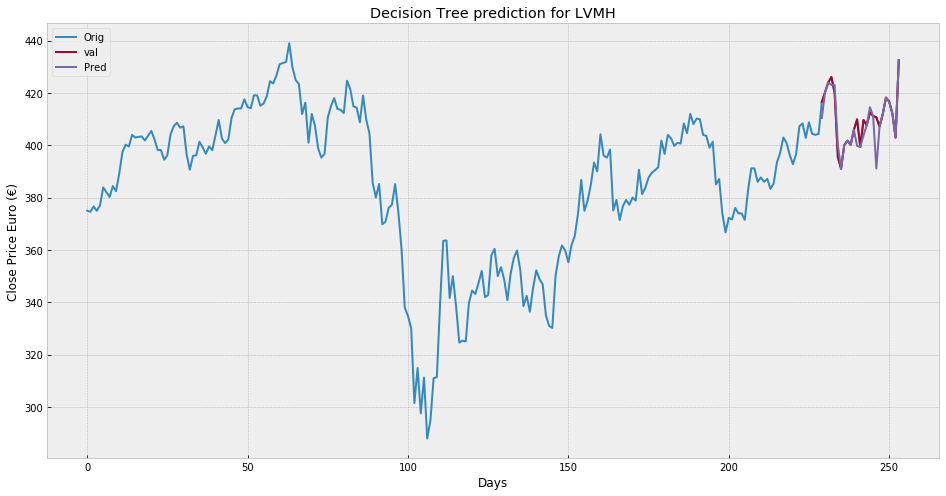

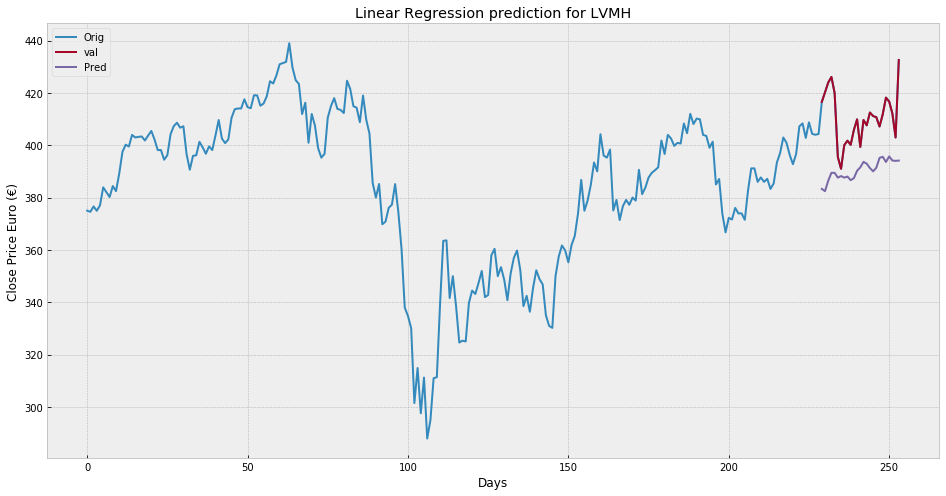

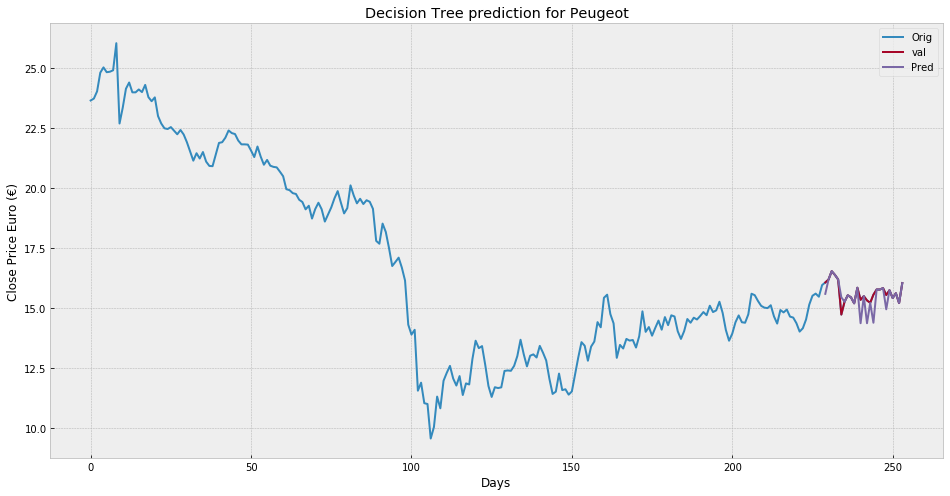

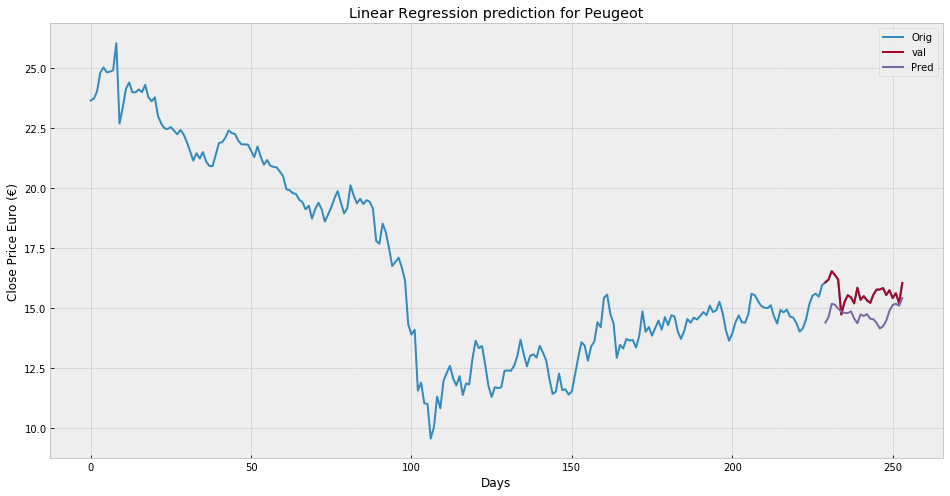

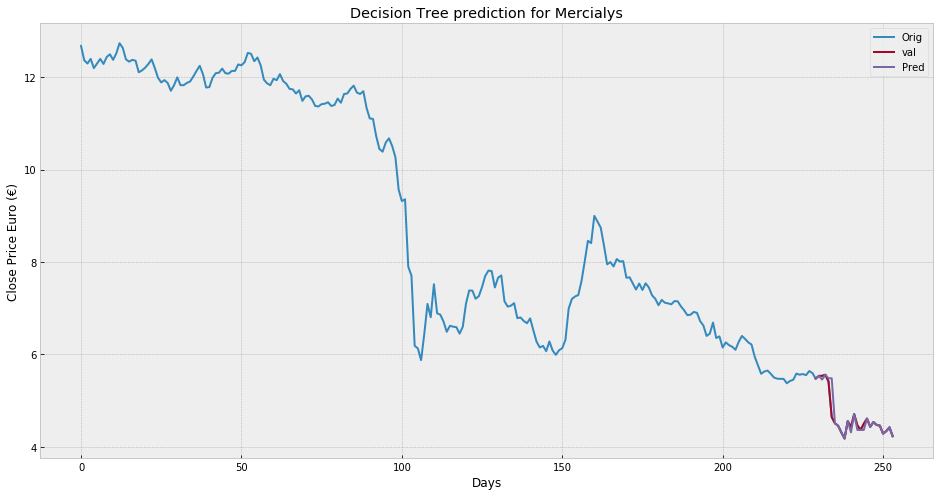

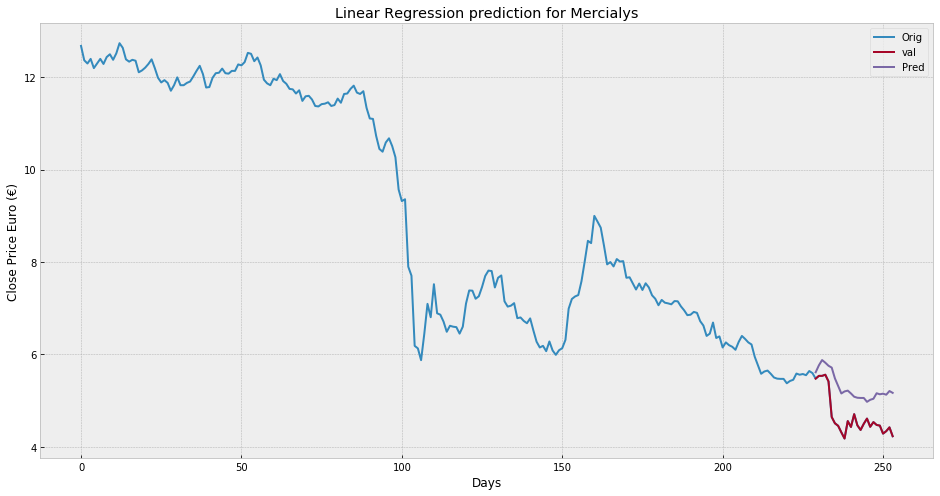

In [354]:
#Visualize the data

models = ['Decision Tree','Linear Regression']
names = ['LVMH_pred','Peugeot_pred','Mercialys_Pred']

for i,k in zip(range(3),names):
    for j,l in zip(range(len(models)),models):
        plt.figure(figsize=(16,8))
        plt.title(f'{l} prediction for {names[i][0:len(names[i])-5]}')
        plt.xlabel('Days')
        plt.ylabel('Close Price Euro (€)')
        plt.plot(stocks[f'Close_{names[i][0:len(names[i])-5]}'])
        plt.plot(valid[[f'Close_{names[i][0:len(names[i])-5]}',f'{l} {k}']])
        plt.legend(['Orig', 'val','Pred'])
        plt.show()
    